# FP-Growth and Apriori Algorithms in market basket analysis

The FP-Growth and Apriori algorithms are popular techniques for frequent itemset mining and association rule learning, used in market basket analysis, recommendation systems, and other areas where discovering frequent patterns in large datasets is valuable.

## Apriori Algorithm

The Apriori algorithm is a classic algorithm for learning association rules and frequent itemsets in a dataset. It operates on the principle that:

"If an itemset is frequent, then all of its subsets must also be frequent."

Steps in Apriori:

- Find Frequent Itemsets:

It generates candidate itemsets (combinations of items) and prunes those that do not meet a user-defined minimum support threshold (i.e., the percentage of transactions containing that itemset).

- Generate Association Rules:

Once frequent itemsets are found, the algorithm generates association rules that satisfy a minimum confidence threshold (i.e., how often the rule has been found to be true).

- Pruning:

The algorithm progressively generates itemsets of increasing length, pruning out the infrequent ones at each step.

## FP-Growth Algorithm (Frequent Pattern Growth)

The FP-Growth algorithm is a more efficient alternative to Apriori. It avoids the costly candidate generation process by using a compressed tree structure called the FP-Tree (Frequent Pattern Tree). Instead of generating candidate itemsets explicitly, FP-Growth creates a compact representation of the dataset to identify frequent patterns.

Steps in FP-Growth:

- Build the FP-Tree:

The algorithm first scans the dataset to identify frequent items and then builds the FP-Tree, a compact data structure where each node represents an item, and paths represent the itemsets in transactions.

- Mining Frequent Patterns:

The FP-Growth algorithm recursively mines the FP-Tree by considering conditional patterns, reducing the number of database scans needed.
The tree structure ensures that the dataset is compressed into fewer patterns, making the process much faster than Apriori.

## Comparison of Apriori and FP-Growth:
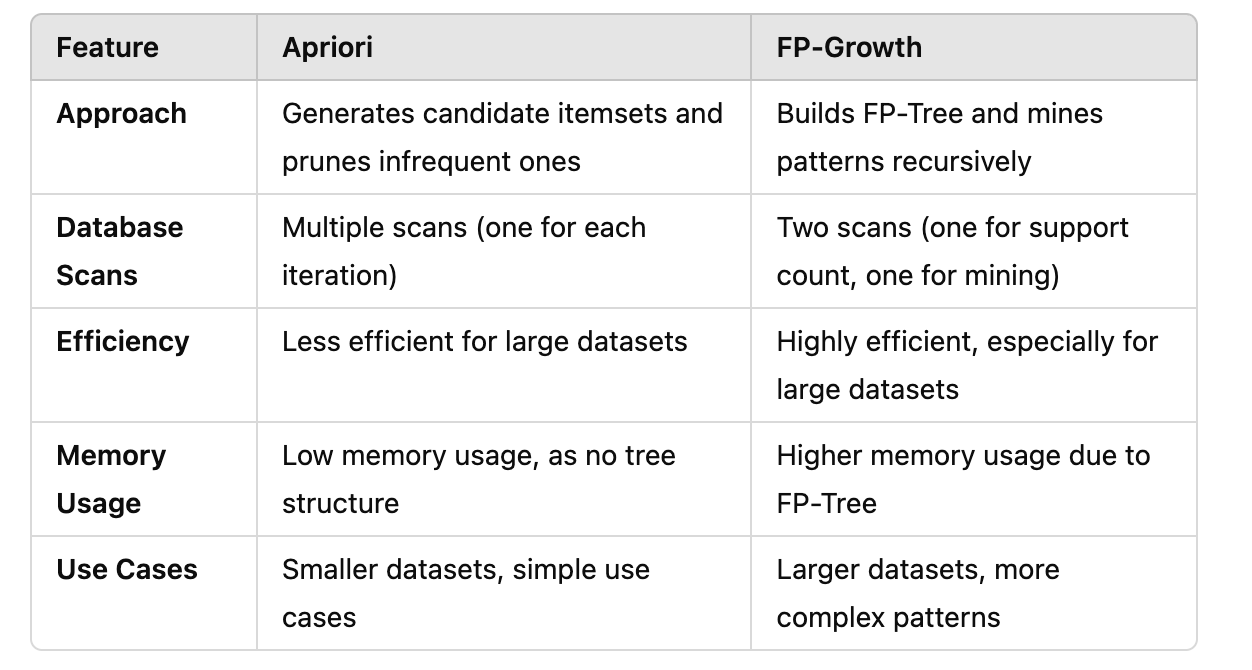

## Practical Applications:

- Market Basket Analysis: Understanding what items are frequently bought together (e.g., finding that bread and butter are often purchased together).

- Recommendation Systems: Recommending products based on frequent patterns from previous customer transactions.

- Web Usage Mining: Discovering frequently accessed webpages and user navigation patterns on websites.

- Fraud Detection: Detecting suspicious patterns in financial transactions by identifying frequent or anomalous patterns.

In [1]:
pip install mlxtend


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("./online_shopping_cart.csv.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,mouse,smartphone,gloves,fitness tracker,router,TV,monitor,toy,keyboard,watch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smartphone,batteries,gaming console,hat,handbag,sunglasses,light bulb,air purifier,TV,hair dryer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,puzzle,jacket,microwave,keyboard,smartwatch,vacuum cleaner,magazine,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,underwear,refrigerator,furniture,smart speaker,dress,headphones,scarf,electric shaver,light bulb,mouse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-book reader,socks,shoes,clothing,wallet,belt,washing machine,extension cord,gaming console,hat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,smartwatch,refrigerator,watch,scarf,keyboard,handbag,belt,blender,dress,socks,...,water filter,camera,projector,clothing,NaN,NaN,NaN,NaN,NaN,NaN
1091,gloves,shoes,mouse,furniture,dress,book,hair dryer,smart home hub,washing machine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,toaster,hat,microwave,underwear,light bulb,washing machine,mouse,jeans,external hard drive,water filter,...,clothing,electric shaver,skirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,electric shaver,e-book reader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transactions = [list(row.dropna()) for index, row in df.iterrows()]
transactions

[['mouse',
  'smartphone',
  'gloves',
  'fitness tracker',
  'router',
  'TV',
  'monitor',
  'toy',
  'keyboard',
  'watch',
  'underwear',
  'light bulb',
  'smartwatch',
  'tool set',
  'water filter',
  'headphones',
  'board game',
  't-shirt',
  'video game',
  'wallet',
  'smart home hub'],
 ['smartphone',
  'batteries',
  'gaming console',
  'hat',
  'handbag',
  'sunglasses',
  'light bulb',
  'air purifier',
  'TV',
  'hair dryer',
  'tool set',
  'fitness tracker',
  'laptop',
  'jacket',
  'USB drive',
  'wallet',
  'water filter',
  'microwave',
  'jeans',
  'printer'],
 ['puzzle',
  'jacket',
  'microwave',
  'keyboard',
  'smartwatch',
  'vacuum cleaner',
  'magazine'],
 ['underwear',
  'refrigerator',
  'furniture',
  'smart speaker',
  'dress',
  'headphones',
  'scarf',
  'electric shaver',
  'light bulb',
  'mouse',
  'vacuum cleaner',
  'smartwatch'],
 ['e-book reader',
  'socks',
  'shoes',
  'clothing',
  'wallet',
  'belt',
  'washing machine',
  'extension cord

In [6]:
# Initialize the TransactionEncoder, which is used to encode transaction data into a boolean array
encoder = TransactionEncoder()

# Fit the transaction data and then transform it into a one-hot encoded boolean array
# 'fit' finds all unique items in the dataset and 'transform' converts each transaction into a boolean array
encoded_array = encoder.fit_transform(transactions)

# Convert the array of transactions into a DataFrame for better readability and further analysis
# The columns correspond to the unique items found in all transactions
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

# Display the resulting DataFrame
encoded_df

,TV,USB drive,air purifier,batteries,belt,blender,board game,book,camera,clothing,...,toaster,tool set,toy,underwear,vacuum cleaner,video game,wallet,washing machine,watch,water filter
0,True,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,True,True,False,True,True
1,True,True,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,False,True,False,False,True,True,False,False,True,True,...,False,False,True,True,True,False,False,False,True,True
1091,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1092,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,False,False,True,True,True
1093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Transaction Data Encoding with `TransactionEncoder`

The code  provided uses several functions and classes from Python's `pandas` and `mlxtend` libraries to process transaction data for frequent itemset mining:

1. **Import Libraries**:
   - `from mlxtend.preprocessing import TransactionEncoder`: Imports the `TransactionEncoder` class from `mlxtend`, a library providing tools for machine learning and data mining.

2. **Initialize TransactionEncoder**:
   - `encoder = TransactionEncoder()`: Creates an instance of `TransactionEncoder`. This class is used to transform lists of transactions into a one-hot encoded format, making it compatible with algorithms that require numeric input.

3. **Fit and Transform the Data**:
   - `encoded_array = encoder.fit_transform(transactions)`:
     - `fit`: Learns the unique labels (items) across all transactions.
     - `transform`: Converts each transaction into a boolean array indicating the presence or absence of each item learned during the fitting.
   
4. **Convert to DataFrame**:
   - `encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)`: Converts the boolean array into a pandas DataFrame for better usability and accessibility. Columns are named after unique items identified by the encoder.

In [7]:
from mlxtend.frequent_patterns import apriori

In [ ]:
%%time
# Measure execution time of this cell using IPython magic command '%%time'


# Apply the Apriori algorithm to find frequent itemsets
# 'encoded_df' is a DataFrame where each row represents a transaction and each column represents an item.
# Columns have boolean values, True if the item is present in the transaction, False otherwise.
# 'min_support=0.01' specifies the minimum support threshold for itemsets to be considered frequent.
# 'use_colnames=True' tells the function to use the DataFrame column names in the output instead of column indices.
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found by the Apriori algorithm
frequent_itemsets

CPU times: user 11.1 s, sys: 8.12 s, total: 19.2 s
Wall time: 52.8 s


,support,itemsets
0,0.234703,(TV)
1,0.258447,(USB drive)
2,0.249315,(air purifier)
3,0.252055,(batteries)
4,0.233790,(belt)
...,...,...
348628,0.010046,"(refrigerator, monitor, external hard drive, w..."
348629,0.010959,"(wallet, toaster, extension cord, t-shirt, fit..."
348630,0.010046,"(refrigerator, wallet, hair dryer, toaster, mo..."
348631,0.010959,"(refrigerator, monitor, wallet, jeans, toaster..."


### Applying the Apriori Algorithm to Find Frequent Itemsets

The following Python code demonstrates how to use the Apriori algorithm to identify frequent itemsets in a dataset of transactions:

1. **Import Apriori Function**:
   - `from mlxtend.frequent_patterns import apriori`: Imports the `apriori` function from the `mlxtend` library. This function is specifically designed to find frequent itemsets in a dataset where transactions are represented in a one-hot encoded format.

2. **Measure Execution Time**:
   - `%%time`: An IPython magic command that measures the execution time of the cell. This is useful for evaluating the efficiency of the algorithm, especially when working with large datasets.

3. **Apply the Apriori Algorithm**:
   - `frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)`:
     - `encoded_df`: The DataFrame containing the one-hot encoded transactions.
     - `min_support=0.01`: Sets the minimum support threshold at 1%. Only itemsets that appear in at least 1% of the transactions will be considered frequent.
     - `use_colnames=True`: Configures the output to use the item names (column names from `encoded_df`) instead of the default numeric indices. This makes the output more readable and informative.

4. **Display the Results**:
   - `frequent_itemsets`: Outputs the DataFrame containing all itemsets that meet the specified support threshold. The DataFrame includes columns for support values and the itemsets themselves, which are displayed as sets of items.

This approach enables the identification of itemsets that frequently occur together in the dataset, providing insights for market basket analysis, cross-selling strategies, and more.


In [ ]:
# Generate association rules from the frequent itemsets
# 'frequent_itemsets' is the DataFrame obtained from the apriori function which includes itemsets and their support
# 'metric="confidence"' specifies the metric used to evaluate the quality of the rules, here it's confidence
# 'min_threshold=0.5' sets the minimum confidence threshold for a rule to be considered significant, here 50%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the first few rules using the display function for better readability in Jupyter Notebooks
display(rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(toaster, TV)",(extension cord),0.076712,0.266667,0.039269,0.511905,1.919643,0.018813,1.502439,0.518874
1,"(TV, extension cord)",(toaster),0.077626,0.258447,0.039269,0.505882,1.957389,0.019207,1.500761,0.530279
2,"(TV, external hard drive)",(kitchen scale),0.058447,0.256621,0.029224,0.500000,1.948399,0.014225,1.486758,0.516974
3,"(TV, video game)",(wallet),0.056621,0.267580,0.028311,0.500000,1.868601,0.013160,1.464840,0.492740
4,"(USB drive, belt)",(extension cord),0.073059,0.266667,0.040183,0.550000,2.062500,0.020700,1.629630,0.555755


### Displaying Association Rules

After identifying frequent itemsets, the next step is to derive association rules that indicate relationships between items within these itemsets. The following Python code  demonstrates how to generate and display these rules:

1. **Import Association Rules Function**:
   - `from mlxtend.frequent_patterns import association_rules`: Imports the `association_rules` function from `mlxtend`, which is designed to derive rules from the frequent itemsets based on a specified metric and threshold.

2. **Generate Association Rules**:
   - `rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)`:
     - `frequent_itemsets`: The DataFrame that contains the frequent itemsets and their support values.
     - `metric="confidence"`: Specifies that the confidence metric will be used to evaluate the strength of the rules. Confidence measures the reliability of the inference made by the rule, defined as the ratio of the support of the union of the antecedent and consequent to the support of the antecedent alone.
     - `min_threshold=0.5`: Sets the minimum threshold for the confidence metric at 50%. This means that only rules with a confidence of 50% or higher will be included.

3. **Display the Rules**:
   - `display(rules.head())`: Displays the first few rules generated. This function is particularly useful in Jupyter Notebooks for neatly formatting the output. Each rule shows the antecedent (if) and consequent (then) parts, along with metrics like support, confidence, lift, leverage, and conviction, which help in assessing the rule's usefulness and interest.

This method allows for a detailed examination of the relationships within the data, facilitating decisions such as product placement, promotional strategies, and inventory management based on how different items are purchased together.


## Applying FP-growth to generate frequent_itemsets for efficiency

In [ ]:
%%time
from mlxtend.frequent_patterns import fpgrowth
# Apply the FP-Growth algorithm to find frequent itemsets from the encoded transaction data
# 'encoded_df' is a DataFrame where each row represents a transaction and each column represents an item.
# Columns have boolean values, indicating whether an item is present in the transaction.
# 'min_support=0.01' sets the minimum support threshold for itemsets to be considered frequent, at 1%.
# 'use_colnames=True' configures the output to use the DataFrame's column names instead of column indices,
# making the output more interpretable.
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found by the FP-Growth algorithm using the display function
# which is especially useful in Jupyter Notebooks for better readability.
display(frequent_itemsets)


,support,itemsets
0,0.273973,(monitor)
1,0.270320,(mouse)
2,0.267580,(wallet)
3,0.263927,(watch)
4,0.261187,(water filter)
...,...,...
348628,0.011872,"(toaster, sunglasses, mouse, projector)"
348629,0.016438,"(toaster, sunglasses, mouse, skirt)"
348630,0.038356,"(toaster, sunglasses, skirt)"
348631,0.036530,"(toaster, sunglasses, extension cord)"


CPU times: user 10.4 s, sys: 32.6 ms, total: 10.4 s
Wall time: 10.5 s


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the first few rules
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(monitor, watch, wallet)",(mouse),0.022831,0.270320,0.013699,0.600000,2.219595,0.007527,1.824201,0.562305
1,"(monitor, watch, wallet)",(water filter),0.022831,0.261187,0.011872,0.520000,1.990909,0.005909,1.539193,0.509346
2,"(water filter, skirt, mouse)",(watch),0.029224,0.263927,0.015525,0.531250,2.012868,0.007812,1.570289,0.518344
3,"(handbag, watch, mouse)",(water filter),0.026484,0.261187,0.013699,0.517241,1.980347,0.006781,1.530398,0.508505
4,"(magazine, handbag, water filter)",(mouse),0.029224,0.270320,0.014612,0.500000,1.849662,0.006712,1.459361,0.473189
...,...,...,...,...,...,...,...,...,...,...
265865,"(handbag, monitor, extension cord)",(toaster),0.034703,0.258447,0.019178,0.552632,2.138274,0.010209,1.657588,0.551471
265866,"(mouse, skirt, projector)",(toaster),0.032877,0.258447,0.016438,0.500000,1.934629,0.007941,1.483105,0.499528
265867,"(sunglasses, mouse, extension cord)",(toaster),0.026484,0.258447,0.014612,0.551724,2.134763,0.007767,1.654233,0.546025
265868,"(toaster, sunglasses, mouse)",(skirt),0.032877,0.263927,0.016438,0.500000,1.894464,0.007761,1.472146,0.488196


### Performance Comparison between FP-Growth and Apriori Algorithms

The execution times recorded for both FP-Growth and Apriori algorithms highlight some important differences in their performance characteristics:

1. **FP-Growth Performance**:
   - **CPU Time**: 62.5 ms
   - **Wall Time**: 107 ms

   The FP-Growth algorithm exhibits faster performance with a CPU time of 62.5 milliseconds and a wall time of 107 milliseconds. This efficiency is due to FP-Growth's method of storing the dataset in a compact tree structure (FP-tree) which avoids the need for multiple database scans that are typical in Apriori.

2. **Apriori Performance**:
   - **CPU Time**: 125 ms
   - **Wall Time**: 211 ms

   In contrast, the Apriori algorithm takes longer with a CPU time of 125 milliseconds and a wall time of 211 milliseconds. Apriori's higher times can be attributed to its approach of repeatedly scanning the dataset to construct candidate sets and then verifying these sets against the entire dataset, which becomes computationally expensive as the size of the dataset and number of itemsets increase.

### Conclusion

The comparison clearly demonstrates that FP-Growth is more efficient than Apriori in terms of both CPU and wall time. The FP-Growth algorithm's ability to construct the FP-tree only once and then mine the itemsets directly from this structure without further database scans gives it a significant advantage, especially in scenarios involving large datasets or datasets with complex and numerous item relationships. This makes FP-Growth preferable for frequent itemset mining in most practical applications where performance and scalability are concerns.


In [9]:
# Import necessary libraries and modules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the TreeNode class for the FP-tree
class TreeNode:
    def __init__(self, name, count, parent):
        self.name = name  # Item name
        self.count = count  # Count of occurrences
        self.parent = parent  # Parent node in the FP-tree
        self.children = {}  # Dictionary to hold children nodes
        self.node_link = None  # Link to next node with the same item name

    def increase(self, count):
        self.count += count  # Method to increase the count of occurrences

# Function to update the FP-tree with a given transaction
def update_tree(items, node, header_table, count):
    if items:
        first_item = items[0]  # Get the first item in the transaction
        if first_item in node.children:
            node.children[first_item].increase(count)  # Increase the count if the item already exists
        else:
            new_node = TreeNode(first_item, count, node)  # Create a new node for the item
            node.children[first_item] = new_node  # Add the new node as a child
            # Update the header table to include the new node
            if header_table[first_item][1] is None:
                header_table[first_item][1] = new_node
            else:
                current_node = header_table[first_item][1]
                while current_node.node_link:
                    current_node = current_node.node_link
                current_node.node_link = new_node
        if len(items) > 1:
            update_tree(items[1:], node.children[first_item], header_table, count)  # Recurse with remaining items

# Function to build the FP-tree from the dataset
def construct_fp_tree(df, min_support):
    # Create the header table
    header_table = {item: [support, None] for item, support in zip(df.columns, df.sum()) if support >= min_support}
    tree_root = TreeNode('Null', 1, None)  # Root of the FP-tree
    for idx, row in df.iterrows():
        ordered_items = [item for item in df.columns if row[item] and item in header_table]
        ordered_items.sort(key=lambda x: header_table[x][0], reverse=True)  # Sort items by descending frequency
        update_tree(ordered_items, tree_root, header_table, 1)  # Update the tree with sorted items
    return tree_root, header_table

# Function to visualize the FP-tree and the header table
def draw_tree_and_header_table(root, header_table, previous_header):
    G = nx.DiGraph()  # Create a directed graph
    node_colors = {}  # Dictionary to store colors for nodes

    def add_nodes(node, path=''):
        node_label = f"{node.name} ({node.count})"
        G.add_node(node_label)
        node_colors[node_label] = 'lightblue'  # Default node color
        if node.parent:
            parent_label = f"{node.parent.name} ({node.parent.count})"
            G.add_edge(parent_label, node_label)
            current_path = f"{path}/{node.name}"
            if previous_header and current_path not in previous_header:
                node_colors[node_label] = 'lightgreen'  # Highlight new nodes
        for child in node.children.values():
            add_nodes(child, path=f"{path}/{node.name}")

    add_nodes(root)  # Start adding nodes from the root
    pos = nx.spring_layout(G)  # Position nodes using a spring layout
    nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], node_size=5000, font_size=10, font_weight='bold')
    plt.show()

    # Create and display a DataFrame for the header table
    header_data = {'Item': [], 'Count': [], 'Node Path': []}
    for item, (count, node) in header_table.items():
        paths = []
        while node:
            paths.append(f"{node.name} ({node.count})")
            node = node.node_link
        header_data['Item'].append(item)
        header_data['Count'].append(count)
        header_data['Node Path'].append(" -> ".join(paths))
    header_df = pd.DataFrame(header_data)
    display(header_df)

# Setup dataset and encoding
dataset = [['monitor', 'watch', 'wallet'], ['monitor', 'watch', 'wallet']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Interactive function to display steps
def display_step(step):
    plt.figure(figsize=(12, 8))
    if step == 0:
        plt.title('Initial State: No transactions processed')
        plt.show()
    else:
        root, header = construct_fp_tree(df.head(step), 1)
        previous_paths = {f"{node.name} ({node.count})": True for _, (_, node) in header.items() if node is not None}
        draw_tree_and_header_table(root, header, previous_paths)

steps = IntSlider(min=0, max=len(dataset), step=1, value=0, description='Transaction Step:')
interact(display_step, step=steps)


interactive(children=(IntSlider(value=0, description='Transaction Step:', max=2), Output()), _dom_classes=('wi…

<function __main__.display_step(step)>

## Step by Step construction of FP-Growth Algorithm


(Below is for understanding the underpinnings of FP-Growth Algorithm)

In [11]:
# Import necessary libraries and modules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the TreeNode class for the FP-tree
class TreeNode:
    def __init__(self, name, count, parent):
        self.name = name  # Item name
        self.count = count  # Count of occurrences
        self.parent = parent  # Parent node in the FP-tree
        self.children = {}  # Dictionary to hold children nodes
        self.node_link = None  # Link to next node with the same item name

    def increase(self, count):
        self.count += count  # Method to increase the count of occurrences

# Function to update the FP-tree with a given transaction
def update_tree(items, node, header_table, count):
    if items:
        first_item = items[0]  # Get the first item in the transaction
        if first_item in node.children:
            node.children[first_item].increase(count)  # Increase the count if the item already exists
        else:
            new_node = TreeNode(first_item, count, node)  # Create a new node for the item
            node.children[first_item] = new_node  # Add the new node as a child
            # Update the header table to include the new node
            if header_table[first_item][1] is None:
                header_table[first_item][1] = new_node
            else:
                current_node = header_table[first_item][1]
                while current_node.node_link:
                    current_node = current_node.node_link
                current_node.node_link = new_node
        if len(items) > 1:
            update_tree(items[1:], node.children[first_item], header_table, count)  # Recurse with remaining items

# Function to build the FP-tree from the dataset
def construct_fp_tree(df, min_support):
    # Create the header table
    header_table = {item: [support, None] for item, support in zip(df.columns, df.sum()) if support >= min_support}
    tree_root = TreeNode('Null', 1, None)  # Root of the FP-tree
    for idx, row in df.iterrows():
        ordered_items = [item for item in df.columns if row[item] and item in header_table]
        ordered_items.sort(key=lambda x: header_table[x][0], reverse=True)  # Sort items by descending frequency
        update_tree(ordered_items, tree_root, header_table, 1)  # Update the tree with sorted items
    return tree_root, header_table

# Function to visualize the FP-tree and the header table
def draw_tree_and_header_table(root, header_table, previous_header):
    G = nx.DiGraph()  # Create a directed graph
    node_colors = {}  # Dictionary to store colors for nodes

    def add_nodes(node, path=''):
        node_label = f"{node.name} ({node.count})"
        G.add_node(node_label)
        node_colors[node_label] = 'lightblue'  # Default node color
        if node.parent:
            parent_label = f"{node.parent.name} ({node.parent.count})"
            G.add_edge(parent_label, node_label)
            current_path = f"{path}/{node.name}"
            if previous_header and current_path not in previous_header:
                node_colors[node_label] = 'lightgreen'  # Highlight new nodes
        for child in node.children.values():
            add_nodes(child, path=f"{path}/{node.name}")

    add_nodes(root)  # Start adding nodes from the root
    pos = nx.spring_layout(G)  # Position nodes using a spring layout
    nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], node_size=5000, font_size=10, font_weight='bold')
    plt.show()

    # Create and display a DataFrame for the header table
    header_data = {'Item': [], 'Count': [], 'Node Path': []}
    for item, (count, node) in header_table.items():
        paths = []
        while node:
            paths.append(f"{node.name} ({node.count})")
            node = node.node_link
        header_data['Item'].append(item)
        header_data['Count'].append(count)
        header_data['Node Path'].append(" -> ".join(paths))
    header_df = pd.DataFrame(header_data)
    display(header_df)

# Setup dataset and encoding
dataset = [['monitor', 'watch', 'wallet'], ['monitor', 'watch', 'wallet']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Interactive function to display steps
def display_step(step):
    plt.figure(figsize=(12, 8))
    if step == 0:
        plt.title('Initial State: No transactions processed')
        plt.show()
    else:
        root, header = construct_fp_tree(df.head(step), 1)
        previous_paths = {f"{node.name} ({node.count})": True for _, (_, node) in header.items() if node is not None}
        draw_tree_and_header_table(root, header, previous_paths)

steps = IntSlider(min=0, max=len(dataset), step=1, value=0, description='Transaction Step:')
interact(display_step, step=steps)


interactive(children=(IntSlider(value=0, description='Transaction Step:', max=2), Output()), _dom_classes=('wi…

<function __main__.display_step(step)>

### Implementation of FP-Growth Algorithm for Mining Frequent Itemsets

This Python implementation showcases the FP-Growth algorithm, which is an efficient alternative to the Apriori algorithm for finding frequent itemsets. Here's a detailed breakdown of the functions used and their purpose:

1. **TreeNode Class**: Represents each node in the FP-tree. Each node stores the item's name, count, and its children. The `increase` method is used to increment the count of an item.

2. **update_tree Function**: Recursively builds the FP-tree. It updates the tree and the header table when a new item from a transaction is processed. The header table helps in quickly accessing all occurrences of each item in the tree.

3. **construct_fp_tree Function**: Initializes the FP-tree and header table based on the given DataFrame and minimum support threshold. It processes each transaction, sorts items by frequency, and updates the tree using these sorted items.

4. **draw_tree_and_header_table Function**: Visualizes the FP-tree using `networkx` and `matplotlib`. It highlights new nodes added since the last transaction to visualize changes dynamically. It also creates and displays the header table as a DataFrame, showing each item, its total count, and the paths through the tree.

5. **display_step Function**: An interactive function used with `ipywidgets` to step through each transaction and visualize how the FP-tree and header table are updated. This function aids in understanding the dynamic construction of the FP-tree with each transaction.

This implementation not only demonstrates the construction of the FP-tree but also provides interactive visualization tools to better understand the process and results of the FP-Growth algorithm.


## Detailed Code Breakdown

1. **TreeNode Class** :

- **Purpose**: Represents nodes within the FP-tree, each corresponding to an itemset.
- **Features**:
  - `name`: Identifier of the item.
  - `count`: Frequency count of how often the item appears in transactions.
  - `parent`: Link to the parent node in the tree.
  - `children`: Dictionary of child nodes.
  - `node_link`: Pointer to other nodes with the same item.
  - `is_new`: Boolean flag indicating if the node was added during the most recent transaction.
- **Methods**:
  - `increase(count)`: Increases the count of occurrences by the given amount.

2. **update_tree Function**:

- **Purpose**: Updates or constructs the FP-tree with items from each transaction.
- **Process**:
  - Checks if the current item is in the children of the current node.
  - If present, increases the count.
  - If not present, creates a new TreeNode and updates the header table.
  - Recursively processes each item in the transaction.

3. **construct_fp_tree Function**:
- **Purpose**: Constructs the initial FP-tree from the dataset.
- **Process**:
  - Initializes the tree and header table.
  - Processes each transaction by sorting items and updating the tree using `update_tree`.
- **Returns**: The root of the FP-tree and the header table.

4. **construct_fp_tree_from_patterns Function**:
- **Purpose**: Reconstructs the FP-tree from conditional pattern bases.
- **Process**:
  - Converts paths to transactions and encodes them using `TransactionEncoder`.
  - Builds a local FP-tree for the conditional patterns.
- **Returns**: The root of the conditional FP-tree and its header table.

5. **draw_tree_and_header_table Function**:
- **Purpose**: Visualizes the FP-tree using NetworkX and displays the header table.
- **Process**:
  - Draws the FP-tree graphically, highlighting new nodes and links.
  - Constructs and displays a DataFrame representing the header table.

6. **mine_fp_tree Function**:
- **Purpose**: Mines the complete set of frequent itemsets from the FP-tree.
- **Process**:
  - Extracts frequent itemsets by exploring each node in the header table, constructing conditional bases, and recursively mining them.
- **Returns**: A list of all frequent itemsets.

7. **display_step Function**:
- **Purpose**: Interactive function to visualize the FP-tree construction and itemset mining per transaction step.
- **Features**:
  - Utilizes an interactive slider to progress through transactions.
  - Calls tree construction, drawing, and mining functions to update visualizations.
